<a href="https://colab.research.google.com/github/khodozzz/neural-networks-tasks/blob/main/1_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Загрузка

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

dataframe = pd.read_csv(url, header=None)
dataframe.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset = dataframe.values

X = dataset[:, 0:4].astype(float)
Y = dataset[:, 4]

In [ ]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
dummy_y = to_categorical(encoded_Y)

In [ ]:
dummy_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

# Модель 1

In [ ]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
report = model.fit(X, dummy_y, epochs=300, batch_size=10, validation_split=0.1)

Epoch 1/300

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

14/14 [==============================] - 0s 24ms/step - loss: 4.3444 - accuracy: 0.3704 - val_loss: 7.4636 - val_accuracy: 0.0000e+00
Epoch 2/300
14/14 [==============================] - 0s 13ms/step - loss: 3.9478 - accuracy: 0.3704 - val_loss: 6.6635 - val_accuracy: 0.0000e+00
Epoch 3/300
14/14 [==============================] - 0s 5ms/step - loss: 3.5523 - accuracy: 0.3704 - val_loss: 5.9696 - val_accuracy: 0.0000e+00
Epoch 4/300
14/14 [==============================] - 0s 5ms/step - loss

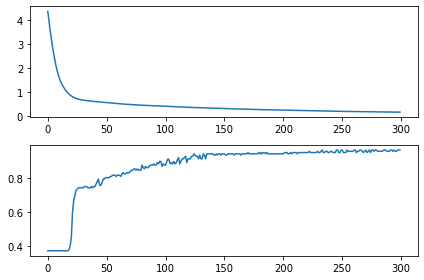

In [ ]:
plt.subplot(211)
plt.plot(report.history['loss'])

plt.subplot(212)
plt.plot(report.history['accuracy'])

plt.tight_layout()

# Модель 2

In [ ]:
model = Sequential()

model.add(Dense(32, input_dim=4, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
report = model.fit(X, dummy_y, epochs=75, batch_size=10, validation_split=0.1)

Epoch 1/75
14/14 [==============================] - 0s 13ms/step - loss: 1.0248 - accuracy: 0.3556 - val_loss: 0.9316 - val_accuracy: 0.0000e+00
Epoch 2/75
14/14 [==============================] - 0s 4ms/step - loss: 0.8629 - accuracy: 0.6148 - val_loss: 0.7243 - val_accuracy: 0.5333
Epoch 3/75
14/14 [==============================] - 0s 4ms/step - loss: 0.7618 - accuracy: 0.7185 - val_loss: 0.9738 - val_accuracy: 0.0000e+00
Epoch 4/75
14/14 [==============================] - 0s 4ms/step - loss: 0.6326 - accuracy: 0.7333 - val_loss: 0.8042 - val_accuracy: 0.0000e+00
Epoch 5/75
14/14 [==============================] - 0s 4ms/step - loss: 0.5059 - accuracy: 0.7778 - val_loss: 0.8092 - val_accuracy: 0.0000e+00
Epoch 6/75
14/14 [==============================] - 0s 4ms/step - loss: 0.4207 - accuracy: 0.7852 - val_loss: 1.0133 - val_accuracy: 0.0000e+00
Epoch 7/75
14/14 [==============================] - 0s 4ms/step - loss: 0.3814 - accuracy: 0.8148 - val_loss: 0.5247 - val_accuracy: 0.8667

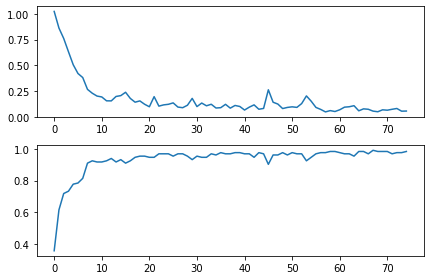

In [ ]:
plt.subplot(211)
plt.plot(report.history['loss'])

plt.subplot(212)
plt.plot(report.history['accuracy'])

plt.tight_layout()